In [ ]:
from bs4 import BeautifulSoup

In [ ]:
with open('/content/drive/MyDrive/parallel_ext_fuel_64x64x64_uint8_paths_simplified.vtp', 'r') as f:
    data = f.read()

In [ ]:
bs_data = BeautifulSoup(data, 'xml')

In [ ]:
print(bs_data)

<?xml version="1.0" encoding="utf-8"?>
<VTKFile byte_order="LittleEndian" header_type="UInt64" type="UnstructuredGrid" version="1.0">
<UnstructuredGrid>
<Piece NumberOfCells="624" NumberOfPoints="578">
<Points>
<DataArray Name="Points" NumberOfComponents="3" format="ascii" type="Int64">
51 32 26 53 32 21 52 31 20 51 31 19 50 31 19 50 32 19 50 32 20 49 32 21 49 32 22 50 32 23 50 32 24 51 32 24 51 32 25 56 32 25 54 32 22 55 32 22 55 32 23 55 32 24 56 32 24 50 23 23 50 28 23 50 27 22 49 26 21 49 25 20 49 26 20 50 25 21 50 24 21 50 24 22 50 23 22 51 23 22 51 23 23 50 28 24 51 28 24 51 29 24 51 30 24 51 31 24 54 24 24 53 23 23 52 23 22 51 22 22 55 24 24 56 24 24 56 25 24 56 26 24 56 27 24 56 28 24 56 29 25 57 29 25 57 30 25 56 30 25 56 31 25 50 26 24 50 25 23 49 24 22 49 24 21 50 27 24 51 27 24 56 27 25 57 27 25 57 27 26 57 26 26 57 28 26 57 29 26 57 30 26 54 39 24 55 39 24 55 38 24 56 38 24 56 38 25 56 37 25 57 37 26 57 35 26 56 34 25 55 33 24 50 40 23 53 39 23 52 39 22 51 39 22 50 39 22 5

In [ ]:
b_name = bs_data.find_all('DataArray', {'Name':'Points'})

In [ ]:
print(b_name[0])
print(type(b_name[0]))

<DataArray Name="Points" NumberOfComponents="3" format="ascii" type="Int64">
51 32 26 53 32 21 52 31 20 51 31 19 50 31 19 50 32 19 50 32 20 49 32 21 49 32 22 50 32 23 50 32 24 51 32 24 51 32 25 56 32 25 54 32 22 55 32 22 55 32 23 55 32 24 56 32 24 50 23 23 50 28 23 50 27 22 49 26 21 49 25 20 49 26 20 50 25 21 50 24 21 50 24 22 50 23 22 51 23 22 51 23 23 50 28 24 51 28 24 51 29 24 51 30 24 51 31 24 54 24 24 53 23 23 52 23 22 51 22 22 55 24 24 56 24 24 56 25 24 56 26 24 56 27 24 56 28 24 56 29 25 57 29 25 57 30 25 56 30 25 56 31 25 50 26 24 50 25 23 49 24 22 49 24 21 50 27 24 51 27 24 56 27 25 57 27 25 57 27 26 57 26 26 57 28 26 57 29 26 57 30 26 54 39 24 55 39 24 55 38 24 56 38 24 56 38 25 56 37 25 57 37 26 57 35 26 56 34 25 55 33 24 50 40 23 53 39 23 52 39 22 51 39 22 50 39 22 50 40 22 51 40 22 51 40 23 50 25 25 50 24 24 49 23 23 50 26 25 50 27 25 51 27 25 51 28 25 51 29 25 51 30 25 51 31 25 54 32 25 55 32 25 53 31 25 52 30 25 53 36 25 54 37 25 55 37 25 52 35 24 51 34 24 50 33 24 50 24

In [ ]:
tst = str(b_name[0])

import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [ ]:
op = cleanhtml(tst)
op = op.strip()
op = op.split(" ")
op

['51',
 '32',
 '26',
 '53',
 '32',
 '21',
 '52',
 '31',
 '20',
 '51',
 '31',
 '19',
 '50',
 '31',
 '19',
 '50',
 '32',
 '19',
 '50',
 '32',
 '20',
 '49',
 '32',
 '21',
 '49',
 '32',
 '22',
 '50',
 '32',
 '23',
 '50',
 '32',
 '24',
 '51',
 '32',
 '24',
 '51',
 '32',
 '25',
 '56',
 '32',
 '25',
 '54',
 '32',
 '22',
 '55',
 '32',
 '22',
 '55',
 '32',
 '23',
 '55',
 '32',
 '24',
 '56',
 '32',
 '24',
 '50',
 '23',
 '23',
 '50',
 '28',
 '23',
 '50',
 '27',
 '22',
 '49',
 '26',
 '21',
 '49',
 '25',
 '20',
 '49',
 '26',
 '20',
 '50',
 '25',
 '21',
 '50',
 '24',
 '21',
 '50',
 '24',
 '22',
 '50',
 '23',
 '22',
 '51',
 '23',
 '22',
 '51',
 '23',
 '23',
 '50',
 '28',
 '24',
 '51',
 '28',
 '24',
 '51',
 '29',
 '24',
 '51',
 '30',
 '24',
 '51',
 '31',
 '24',
 '54',
 '24',
 '24',
 '53',
 '23',
 '23',
 '52',
 '23',
 '22',
 '51',
 '22',
 '22',
 '55',
 '24',
 '24',
 '56',
 '24',
 '24',
 '56',
 '25',
 '24',
 '56',
 '26',
 '24',
 '56',
 '27',
 '24',
 '56',
 '28',
 '24',
 '56',
 '29',
 '25',
 '57',
 '29',

In [ ]:
len(op)/3

578.0

In [ ]:
edges = bs_data.find_all('DataArray', {'Name':'connectivity'})

In [ ]:
edges

[<DataArray Name="connectivity" format="ascii" type="Int64">
 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 0 1 14 14 15 15 16 16 17 17 18 18 13 20 21 21 22 22 23 23 24 24 23 23 25 25 26 26 27 27 28 28 29 29 30 30 19 20 31 31 32 32 33 33 34 34 35 35 11 36 37 37 38 38 39 39 29 36 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47 48 48 49 49 50 50 13 51 52 52 53 53 54 54 26 26 25 51 55 55 56 56 32 44 57 57 58 58 59 59 60 60 61 61 62 62 63 63 49 64 65 65 66 66 67 67 68 68 69 69 70 70 71 71 72 72 73 73 16 64 75 75 76 76 77 77 78 78 79 79 80 80 81 81 74 82 83 83 84 84 19 82 85 85 86 86 87 87 88 88 89 89 90 90 91 91 12 92 93 93 13 92 94 94 95 95 90 96 97 97 98 98 69 69 68 96 99 99 100 100 101 101 10 102 103 103 104 104 105 105 106 106 107 107 30 102 108 108 109 109 110 110 111 111 112 112 113 113 114 114 115 115 0 116 117 117 118 118 119 119 66 116 120 120 121 121 100 122 123 123 124 124 125 125 60 122 127 127 128 128 129 129 130 130 131 131 132 132 133 133 126 134 135 135 136 136 137 13

In [ ]:
edges = str(edges[0])

In [ ]:
edges = cleanhtml(edges)
edges = edges.strip()
edges = edges.split(" ")
edges

['1',
 '2',
 '2',
 '3',
 '3',
 '4',
 '4',
 '5',
 '5',
 '6',
 '6',
 '7',
 '7',
 '8',
 '8',
 '9',
 '9',
 '10',
 '10',
 '11',
 '11',
 '12',
 '12',
 '0',
 '1',
 '14',
 '14',
 '15',
 '15',
 '16',
 '16',
 '17',
 '17',
 '18',
 '18',
 '13',
 '20',
 '21',
 '21',
 '22',
 '22',
 '23',
 '23',
 '24',
 '24',
 '23',
 '23',
 '25',
 '25',
 '26',
 '26',
 '27',
 '27',
 '28',
 '28',
 '29',
 '29',
 '30',
 '30',
 '19',
 '20',
 '31',
 '31',
 '32',
 '32',
 '33',
 '33',
 '34',
 '34',
 '35',
 '35',
 '11',
 '36',
 '37',
 '37',
 '38',
 '38',
 '39',
 '39',
 '29',
 '36',
 '40',
 '40',
 '41',
 '41',
 '42',
 '42',
 '43',
 '43',
 '44',
 '44',
 '45',
 '45',
 '46',
 '46',
 '47',
 '47',
 '48',
 '48',
 '49',
 '49',
 '50',
 '50',
 '13',
 '51',
 '52',
 '52',
 '53',
 '53',
 '54',
 '54',
 '26',
 '26',
 '25',
 '51',
 '55',
 '55',
 '56',
 '56',
 '32',
 '44',
 '57',
 '57',
 '58',
 '58',
 '59',
 '59',
 '60',
 '60',
 '61',
 '61',
 '62',
 '62',
 '63',
 '63',
 '49',
 '64',
 '65',
 '65',
 '66',
 '66',
 '67',
 '67',
 '68',
 '68',
 '69

In [ ]:
len(edges)

1248

In [ ]:
l1 = []
count = 0
for item in edges:
    if item not in l1:
        count += 1
        l1.append(item)

In [ ]:
count

578

In [ ]:
type(edges[0])

str

In [ ]:
for i in range(len(edges)):
  edges[i] = int(edges[i])

In [ ]:
type(edges[0])

int

In [ ]:
print(edges)

[1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 0, 1, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 13, 20, 21, 21, 22, 22, 23, 23, 24, 24, 23, 23, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 19, 20, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 11, 36, 37, 37, 38, 38, 39, 39, 29, 36, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 13, 51, 52, 52, 53, 53, 54, 54, 26, 26, 25, 51, 55, 55, 56, 56, 32, 44, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 49, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 16, 64, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 74, 82, 83, 83, 84, 84, 19, 82, 85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 12, 92, 93, 93, 13, 92, 94, 94, 95, 95, 90, 96, 97, 97, 98, 98, 69, 69, 68, 96, 99, 99, 100, 100, 101, 101, 10, 102, 103, 103, 104, 104, 105, 105, 106, 106, 107, 107, 30, 102, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 114, 

In [ ]:
print(edges[100], edges[101])

49 50


In [ ]:
len(edges)

1248

In [ ]:
import networkx as nx

In [ ]:
G=nx.Graph()

In [ ]:
length = len(edges)
for i in range(0,1248,2):
  print(edges[i] , edges[i+1])
  G.add_edge(edges[i],edges[i+1])



1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 0
1 14
14 15
15 16
16 17
17 18
18 13
20 21
21 22
22 23
23 24
24 23
23 25
25 26
26 27
27 28
28 29
29 30
30 19
20 31
31 32
32 33
33 34
34 35
35 11
36 37
37 38
38 39
39 29
36 40
40 41
41 42
42 43
43 44
44 45
45 46
46 47
47 48
48 49
49 50
50 13
51 52
52 53
53 54
54 26
26 25
51 55
55 56
56 32
44 57
57 58
58 59
59 60
60 61
61 62
62 63
63 49
64 65
65 66
66 67
67 68
68 69
69 70
70 71
71 72
72 73
73 16
64 75
75 76
76 77
77 78
78 79
79 80
80 81
81 74
82 83
83 84
84 19
82 85
85 86
86 87
87 88
88 89
89 90
90 91
91 12
92 93
93 13
92 94
94 95
95 90
96 97
97 98
98 69
69 68
96 99
99 100
100 101
101 10
102 103
103 104
104 105
105 106
106 107
107 30
102 108
108 109
109 110
110 111
111 112
112 113
113 114
114 115
115 0
116 117
117 118
118 119
119 66
116 120
120 121
121 100
122 123
123 124
124 125
125 60
122 127
127 128
128 129
129 130
130 131
131 132
132 133
133 126
134 135
135 136
136 137
137 138
138 139
139 140
140 106
134 141
141 142
142 143
143 144


In [ ]:
len(G.edges)

621

In [ ]:
G.edges

EdgeView([(1, 2), (1, 14), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (10, 101), (11, 12), (11, 35), (12, 0), (12, 91), (0, 115), (0, 167), (0, 181), (0, 210), (14, 15), (15, 16), (16, 17), (16, 73), (17, 18), (18, 13), (13, 50), (13, 93), (20, 21), (20, 31), (21, 22), (22, 23), (23, 24), (23, 25), (25, 26), (26, 27), (26, 54), (27, 28), (28, 29), (29, 30), (29, 39), (30, 19), (30, 107), (19, 84), (31, 32), (32, 33), (32, 56), (33, 34), (34, 35), (36, 37), (36, 40), (37, 38), (38, 39), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (44, 57), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (49, 63), (51, 52), (51, 55), (52, 53), (53, 54), (55, 56), (57, 58), (58, 59), (59, 60), (60, 61), (60, 125), (60, 160), (61, 62), (62, 63), (64, 65), (64, 75), (65, 66), (66, 67), (66, 119), (67, 68), (68, 69), (69, 70), (69, 98), (70, 71), (70, 174), (71, 72), (72, 73), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 74), (82, 83), (82, 85), (83

In [ ]:
pos = nx.spring_layout(G , k =1 , dim =2 , scale = 100 )

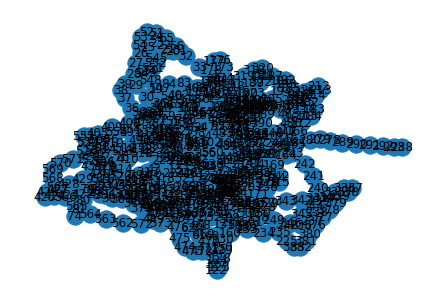

In [ ]:
nx.draw(G, with_labels= True)

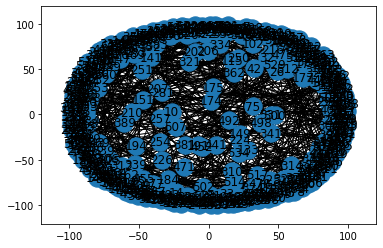

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

nx.draw_networkx(G,pos)

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)


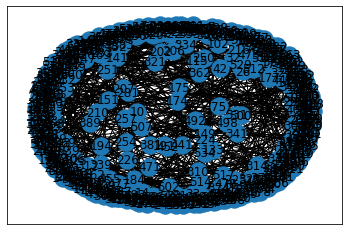

<Figure size 5000x5000 with 0 Axes>

In [ ]:
nx.draw_networkx_nodes(G, pos, node_size=300)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.figure(figsize=(5, 5), dpi=1000)
plt.show() 